In [2]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Loading the data

In [3]:
df = pd.read_csv('abalone.data.txt',header=None, names=['Sex', 'Length', 'Diam', 'Height', 'WholeWeight', 
                                                     'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'])
df.head()

,Sex,Length,Diam,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diam,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
print(df["Sex"].unique())

['M' 'F' 'I']


In [6]:
df = pd.concat([pd.get_dummies(df["Sex"],prefix="Sex"),df],1)
df.head()

,Sex_F,Sex_I,Sex_M,Sex,Length,Diam,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0,1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df["Target"] = 0
df.loc[df['Rings'] <9, "Target"] = 1
df.loc[(df['Rings'] >= 9) & (df['Rings'] <= 10), "Target"] = 2
df.loc[df['Rings'] >10, "Target" ] = 3
df["Target"] = df["Target"].astype('category')
df.head()

,Sex_F,Sex_I,Sex_M,Sex,Length,Diam,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Target
0,0,0,1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3
1,0,0,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,1,0,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0,0,1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,0,1,0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [8]:
#df.save = df.drop({"Sex","Rings"},1)

In [9]:
#df.save.to_csv("df.save.csv", index=False)

In [10]:
#df.save = pd.read_csv("df.save.csv")
#df.save.head()

# Data exploration

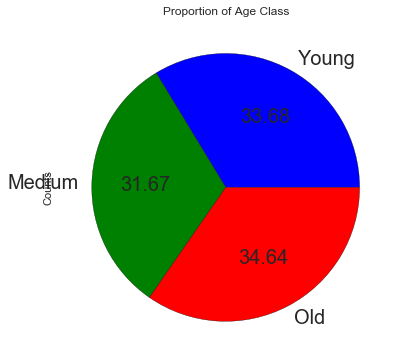

In [11]:
# Apply a pie plot to see if this data set is unbalance or not
temp = df[['Target','WholeWeight']]
temp = temp.groupby('Target').size().reset_index(name='Counts')

temp.Counts.plot(kind='pie', subplots=True, labels=['Young', 'Medium', 'Old'],autopct='%.2f', fontsize=20, figsize=(6, 6))
plt.title("Proportion of Age Class")

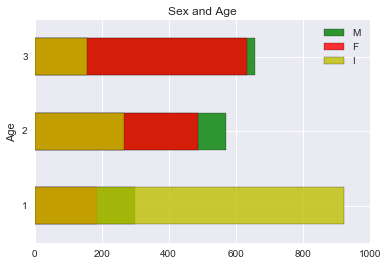

In [12]:
# Relationship between Sex and Target
df_M = df.Target[df.Sex == 'M'].value_counts().sort_index()
df_F = df.Target[df.Sex == 'F'].value_counts().sort_index()
df_I = df.Target[df.Sex == 'I'].value_counts().sort_index()

df_M.plot(kind = 'barh', color = "g", label = "M", alpha = 0.8)
df_F.plot(kind = 'barh', color = "r", label = "F", alpha = 0.8)
df_I.plot(kind = 'barh', color = "y", label = "I", alpha = 0.8)

plt.ylabel("Age")
plt.title("Sex and Age")
plt.legend(loc='best')

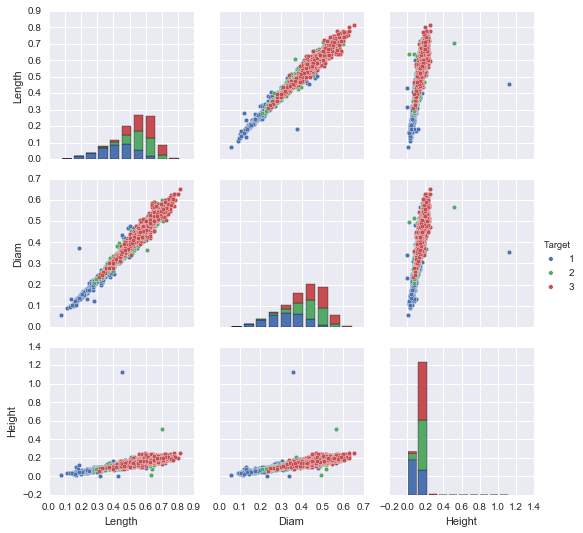

In [13]:
#Pairplot
vars=['Length', 'Diam', 'Height']
sns.pairplot(df, vars=vars, hue="Target")

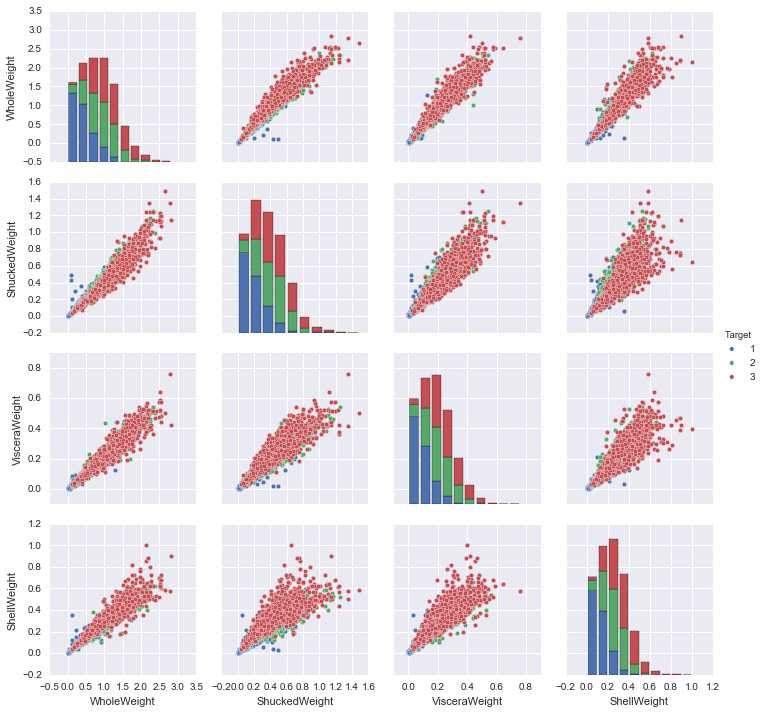

In [14]:
vars=['WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']
sns.pairplot(df, vars=vars, hue="Target")

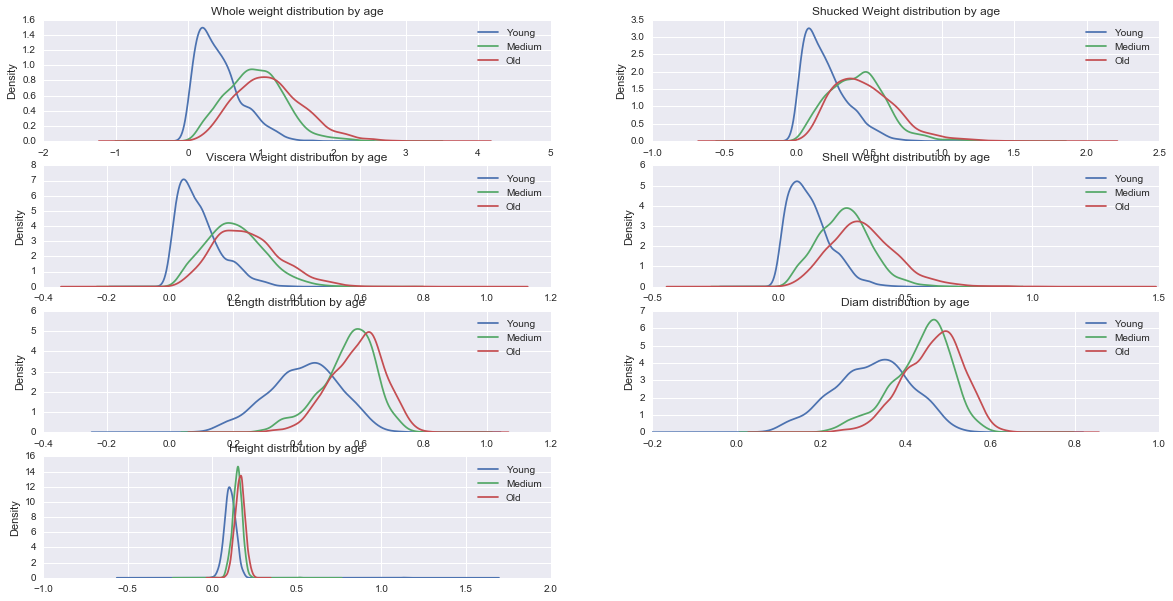

In [15]:
#Take a look at features' distribution by different age categories

# Set parameters of graphs
fig = plt.figure(figsize=(20,10), dpi=1600) 
alpha=alpha_scatterplot = 0.3 

plt.subplot2grid((4,2),(0,0))
df.WholeWeight[df.Target == 1].plot.kde()
df.WholeWeight[df.Target == 2].plot.kde()
df.WholeWeight[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Whole weight distribution by age")

plt.subplot2grid((4,2),(0,1))
df.ShuckedWeight[df.Target == 1].plot.kde()
df.ShuckedWeight[df.Target == 2].plot.kde()
df.ShuckedWeight[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Shucked Weight distribution by age")

plt.subplot2grid((4,2),(1,0))
df.VisceraWeight[df.Target == 1].plot.kde()
df.VisceraWeight[df.Target == 2].plot.kde()
df.VisceraWeight[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Viscera Weight distribution by age")

plt.subplot2grid((4,2),(1,1))
df.ShellWeight[df.Target == 1].plot.kde()
df.ShellWeight[df.Target == 2].plot.kde()
df.ShellWeight[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Shell Weight distribution by age")

plt.subplot2grid((4,2),(2,0))
df.Length[df.Target == 1].plot.kde()
df.Length[df.Target == 2].plot.kde()
df.Length[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Length distribution by age")

plt.subplot2grid((4,2),(2,1))
df.Diam[df.Target == 1].plot.kde()
df.Diam[df.Target == 2].plot.kde()
df.Diam[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Diam distribution by age")

plt.subplot2grid((4,2),(3,0))
df.Height[df.Target == 1].plot.kde()
df.Height[df.Target == 2].plot.kde()
df.Height[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Height distribution by age")

plt.legend(("Young", "Medium", "Old"))

# Feature Selection and Feature Engineering

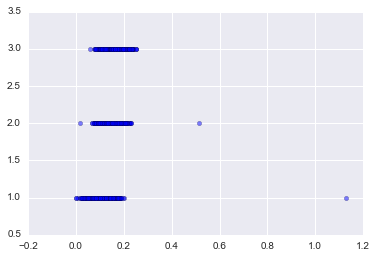

In [16]:
#outlier detection
plt.scatter(df.Height, df.Target, alpha=0.5)

In [23]:
df = df[df.Height <0.4]
df.Length.count()

4175

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

def logreg_test (train, target):
    logreg= LogisticRegression()
    
    scores = cross_val_score(logreg, train, target, cv=5, n_jobs=4,
                         scoring='accuracy')
    print("CV scores:")
    print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
        scores.min(), scores.mean(), scores.max()))


/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
train_1 = df[['Sex_F','Sex_I','Sex_M', 'Length', 'Diam', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']]
train_2 = df[['Sex_F','Sex_I','Sex_M', 'Length', 'Diam', 'Height','WholeWeight']]
target = df.Target 

In [26]:
logreg_test(train_1,target)
logreg_test(train_2,target)

CV scores:
min: 0.566, mean: 0.620, max: 0.664
CV scores:
min: 0.484, mean: 0.554, max: 0.603


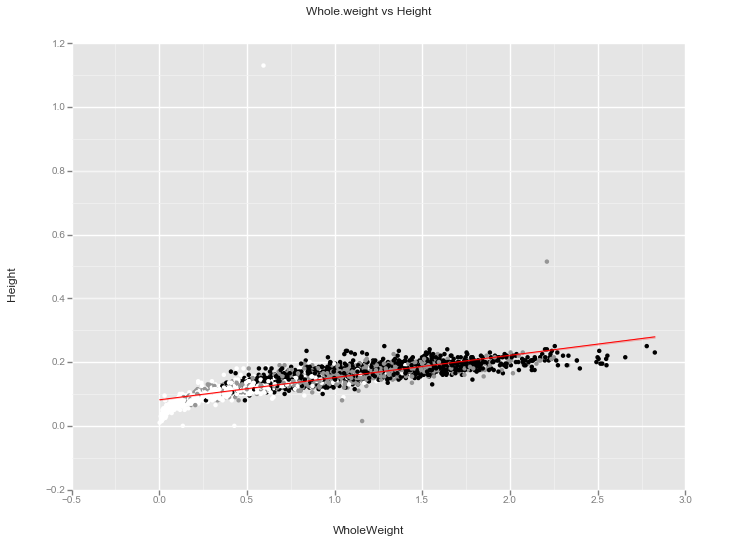

<ggplot: (303331713)>

In [23]:
from ggplot import *
data = df[['Height','WholeWeight','Target','Diam','Length']]

ggplot(aes(x ='WholeWeight', y ='Height'), data=data) + \
    geom_point(aes(colour = 'Target'))+\
    stat_smooth(color='red') + \
    ggtitle("Whole.weight vs Height")

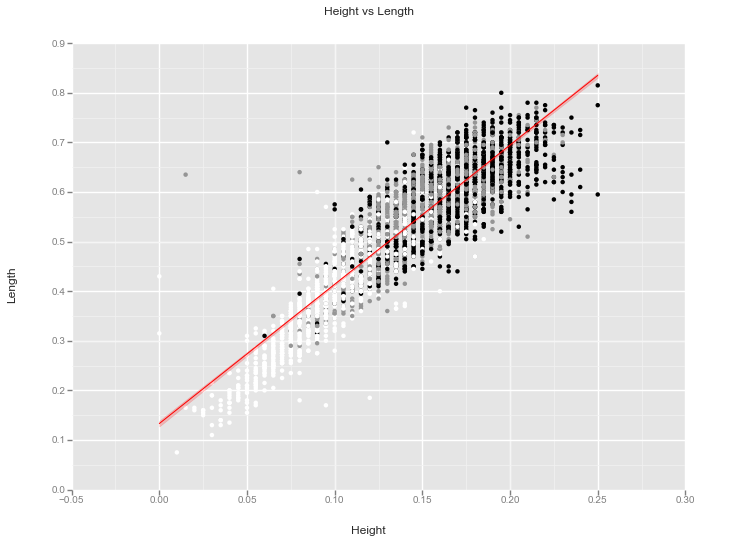

<ggplot: (303516077)>

In [21]:
ggplot(aes(x ='Height', y ='Length'), data=data) + \
    geom_point(aes(colour = 'Target'))+\
    stat_smooth(color='red') + \
    ggtitle("Height vs Length")

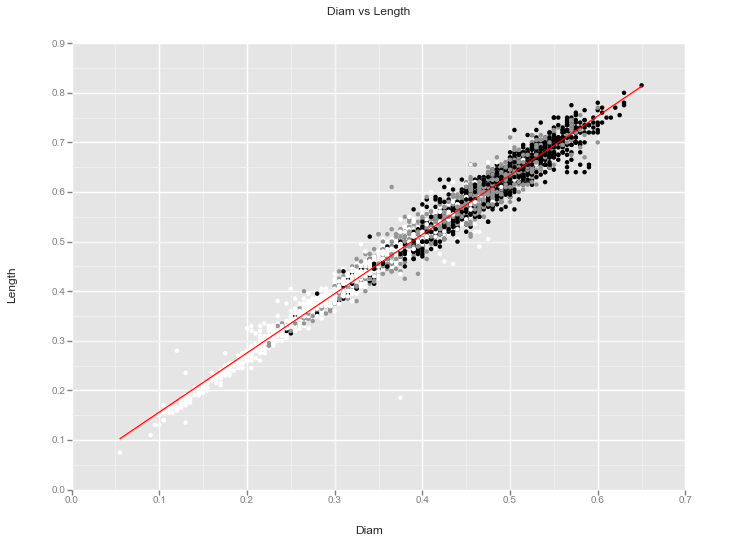

<ggplot: (303716425)>

In [22]:
ggplot(aes(x ='Diam', y ='Length'), data=data) + \
    geom_point(aes(colour = 'Target'))+\
    stat_smooth(color='red') + \
    ggtitle("Diam vs Length")

In [18]:
df['Volume'] = df[['Length', 'Diam', 'Height']].product(axis=1)
df.head()

,Sex_F,Sex_I,Sex_M,Sex,Length,Diam,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Target,Volume
0,0,0,1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3,0.015777
1,0,0,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0.008347
2,1,0,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2,0.030051
3,0,0,1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2,0.020075
4,0,1,0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0.006732


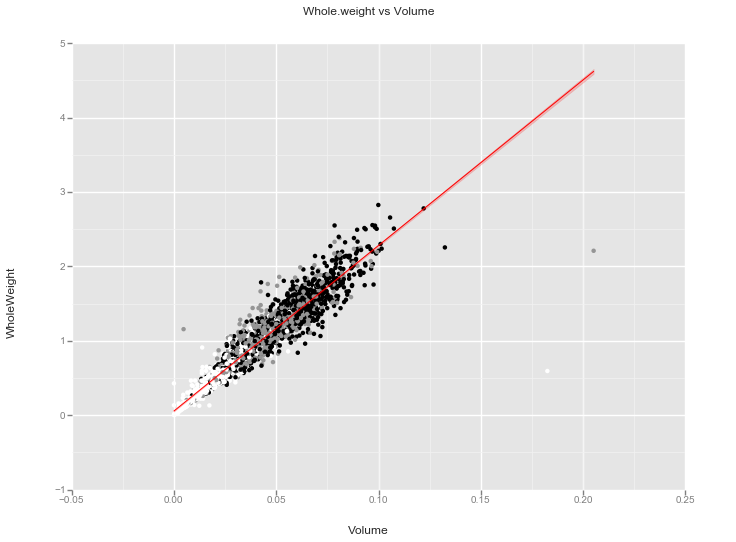

<ggplot: (297596605)>

In [21]:
data = df[['Volume','WholeWeight','Target']]

ggplot(aes(x ='Volume', y ='WholeWeight'), data=data) + \
    geom_point(aes(colour = 'Target'))+\
    stat_smooth(color='red') + \
    ggtitle("Whole.weight vs Volume")

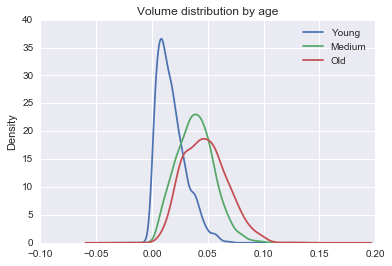

In [25]:
df.Volume[df.Target == 1].plot.kde()
df.Volume[df.Target == 2].plot.kde()
df.Volume[df.Target == 3].plot.kde()
plt.legend(("Young", "Medium", "Old"))
plt.title("Volume distribution by age")

In [29]:
train_1 = df[['Sex_F','Sex_I','Sex_M', 'Length', 'Diam', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']]
train_2 = df[['Sex_F','Sex_I','Sex_M','Volume','WholeWeight','ShuckedWeight', 'VisceraWeight', 'ShellWeight']]
logreg_test(train_1,target)
logreg_test(train_2,target)

CV scores:
min: 0.566, mean: 0.620, max: 0.664
CV scores:
min: 0.572, mean: 0.624, max: 0.671


# Model Selection

In [30]:
train = df[['Sex_F','Sex_I','Sex_M','Volume','WholeWeight','ShuckedWeight', 'VisceraWeight', 'ShellWeight']]

In [37]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from datetime import datetime



def gsCV_accuracy(name,classifier, params, train, target):
    startTime = datetime.now()
    print name+":"
    gs= GridSearchCV(classifier, params, n_jobs=-1, cv=5,scoring="accuracy")
    gs.fit(train, target)
    print gs.best_params_, gs.best_score_
    
    predict = gs.best_estimator_.predict(train)
    print(metrics.classification_report(target,predict))
    print(metrics.confusion_matrix(target, predict))
    print(cross_val_score(gs.best_estimator_, train,target,cv= 5).mean())
    print "\n"+"Completion time: "+ str(datetime.now()-startTime)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classifiers = []
    
logreg_tuned_parameters = [{'C': np.logspace(-1, 2, 4),'penalty':['l1','l2']}]
classifiers.append(["Logistic Regression", LogisticRegression(), logreg_tuned_parameters])
    
svm_tuned_parameters = [{'kernel': ['linear','rbf'],
                             'C': np.logspace(-1, 2, 4),
                             'gamma': np.logspace(-4, 0, 5)}]
classifiers.append(["SVM", SVC(), svm_tuned_parameters])
 
rf_tuned_parameters = [{"max_depth": [5, 7, None],
                             "min_samples_split": [2,10,20],
                             "min_samples_leaf": [2,10,20],
                             "criterion": ["gini", "entropy"],
                             "n_estimators": [100,250,500]}]                
classifiers.append(["RandomForest", RandomForestClassifier(n_jobs=-1), rf_tuned_parameters])

knn_tuned_parameters = [{"n_neighbors": [1, 3, 5, 10, 20]}]
classifiers.append(["kNN", KNeighborsClassifier(),knn_tuned_parameters])
 

nn_tuned_parameters = [{'solver': ['lbgfs', 'sgd', 'adam'], 
                        'alpha': [1,1e-1,1e-2,1e-3, 1e-4,1e-5],
                        'hidden_layer_sizes': [(100,), (200,), (300,), (400,),(500,)],
                        'max_iter':[500], 'random_state':[0],
                        'learning_rate' : ['constant', 'invscaling', 'adaptive']}]
classifiers.append(["nn", MLPClassifier(),nn_tuned_parameters])


In [39]:
for i in range(len(classifiers)):
    gsCV_accuracy(classifiers[i][0],classifiers[i][1], classifiers[i][2], train, target)

Logistic Regression:
{'penalty': 'l2', 'C': 100.0} 0.632574850299
             precision    recall  f1-score   support

          1       0.68      0.82      0.75      1406
          2       0.52      0.36      0.43      1322
          3       0.67      0.72      0.69      1447

avg / total       0.62      0.64      0.63      4175

[[1153  188   65]
 [ 385  482  455]
 [ 148  262 1037]]
0.632574310979

Completion time: 0:00:04.194423
SVM:
{'kernel': 'rbf', 'C': 100.0, 'gamma': 1.0} 0.651497005988
             precision    recall  f1-score   support

          1       0.78      0.76      0.77      1406
          2       0.54      0.55      0.54      1322
          3       0.71      0.70      0.71      1447

avg / total       0.68      0.68      0.68      4175

[[1074  281   51]
 [ 225  730  367]
 [  79  349 1019]]
0.651502795294

Completion time: 0:00:19.221804
RandomForest:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10} 

/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:561: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:561: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:561: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:561: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

In [44]:
from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(C= 100, penalty = 'l2')
svm = SVC(C=100, gamma = 1, kernel='rbf',probability=True)
rf = RandomForestClassifier(n_estimators=500,min_samples_split=20, 
                            criterion = 'entropy', max_depth =None ,
                            min_samples_leaf=20 )
knn=KNeighborsClassifier(n_neighbors=20)
nn= MLPClassifier(solver= 'lbgfs', learning_rate= 'constant', max_iter= 500, random_state=0, alpha = 1, hidden_layer_sizes =400,)


df_voting = pd.DataFrame(columns=('w1', 'w2','w3','w4','w5', 'mean', 'std'))

for w1 in range(1,3):
    for w2 in range(1,3):
        for w3 in range(1,3):
            for w4 in range(1,3):
                for w5 in range(1,3):

                    if len(set((w1,w2,w3,w4,w5))) == 1: # skip if all weights are equal
                        continue

                    eclf = VotingClassifier(estimators=[('logreg',logreg), ('svm',svm),('rf',rf),('knn',knn),('nn',nn)], voting='soft',weights=[w1,w2,w3,w4,w5])
                    scores = cross_val_score(estimator=eclf,
                                     X=train,
                                     y=target,
                                     cv=5,
                                     scoring='accuracy',
                                     n_jobs=1)

                    df_voting.loc[i] = [w1,w2,w3,w4,w5,scores.mean(), scores.std()]
                    i += 1
df_voting.sort(columns=['mean', 'std'], ascending=False)

/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,w1,w2,w3,w4,w5,mean,std
10,1,1,2,2,2,0.657024,0.017994
8,1,1,2,1,2,0.657023,0.016379
6,1,1,1,2,2,0.656542,0.015975
14,1,2,1,2,2,0.656302,0.015136
18,1,2,2,2,2,0.656069,0.017771
20,2,1,1,1,2,0.656057,0.015609
32,2,2,2,1,2,0.655821,0.015903
4,1,1,1,1,2,0.655584,0.016755
5,1,1,1,2,1,0.655344,0.015601
26,2,1,2,2,2,0.655104,0.015852


In [45]:
eclf2 = VotingClassifier(estimators=[('logreg',logreg), ('svm',svm),('rf',rf),('knn',knn),('nn',nn)], voting='hard')
scores = cross_val_score(estimator=eclf2,X=train,y=target,cv=5,scoring='accuracy')
print scores.mean(), scores.std()

0.65606172468 0.0135226096083


In [46]:
from sklearn.ensemble import VotingClassifier

df_voting = pd.DataFrame(columns=('w1', 'w2','w3', 'mean', 'std'))

for w1 in range(1,3):
    for w2 in range(1,3):
        for w3 in range(1,3):

                if len(set((w1,w2,w3))) == 1: # skip if all weights are equal
                    continue

                eclf = VotingClassifier(estimators=[('svm',svm),('rf',rf),('nn',nn)], voting='soft',weights=[w1,w2,w3])
                scores = cross_val_score(estimator=eclf,
                                     X=train,
                                     y=target,
                                     cv=5,
                                     scoring='accuracy',
                                     n_jobs=1)

                df_voting.loc[i] = [w1,w2,w3,scores.mean(), scores.std()]
                i += 1
df_voting.sort(columns=['mean', 'std'], ascending=False)

/Users/Julian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,w1,w2,w3,mean,std
36,1,2,2,0.658461,0.017244
35,1,2,1,0.657502,0.014286
39,2,2,1,0.657501,0.014410
38,2,1,2,0.657262,0.015340
34,1,1,2,0.657261,0.016162
37,2,1,1,0.656061,0.013801


In [51]:
eclf2 = VotingClassifier(estimators=[('svm',svm),('rf',rf),('nn',nn)], voting='hard')
scores = cross_val_score(eclf2, train, target, cv=5,scoring='accuracy')
print scores.mean(), scores.std()

0.657736939532 0.0144168010123


In [52]:
eclf = VotingClassifier(estimators=[('svm',svm),('rf',rf),('nn',nn)], voting='soft',weights=[1,2,2])
scores = cross_val_score(eclf, train, target, cv=5,scoring='accuracy')
print("Ensemble CV scores:")
print("min: {:.5f}, mean: {:.5f}, max: {:.5f}".format(
    scores.min(), scores.mean(), scores.max()))
eclf.fit(train,target)
predict = eclf.predict(train)
print(metrics.classification_report(target,predict))
print(metrics.confusion_matrix(target, predict))

Ensemble CV scores:
min: 0.63680, mean: 0.65822, max: 0.68345
             precision    recall  f1-score   support

          1       0.78      0.79      0.78      1406
          2       0.56      0.53      0.55      1322
          3       0.71      0.74      0.73      1447

avg / total       0.69      0.69      0.69      4175

[[1111  247   48]
 [ 242  702  378]
 [  77  304 1066]]


# Futher Study 